<a href="https://colab.research.google.com/github/R4t0LoCo/R4t0LoCo/blob/main/LSTM_oilP20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [95]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1bcvqcP_PiGtD1VVo0rwbdwx62AQqngDV', index_col=0, parse_dates=True)

In [96]:
# Select the columns for input features and target variable
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [97]:
# Select the time horizon for the target variable
horizon = 20 # or 20 or 30

In [98]:
# Select the time horizon for the target variable
horizon =10 # or 20 or 30

In [99]:
# Shift the target variable forward by the chosen horizon
y = y.shift(-horizon)

In [100]:
# Remove the last horizon rows to match the new target variable
X = X[:-horizon]
y = y[:-horizon]

In [101]:
# Split the data into training and validation sets
train_size = int(len(X) * 0.21)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [102]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [103]:
# Reshape the input data to be 3-dimensional for RNN and LSTM models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [104]:
# Define the LSTM model with an additional LSTM layer
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True, activation='relu'),
    LSTM(64, activation='relu'),
    Dense(1)
])

In [105]:
# Compile the models
lstm_model.compile(optimizer='adam', loss='mse')

In [106]:
# Train the models
lstm_history = lstm_model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val), batch_size=64, verbose=2)

Epoch 1/8
346/346 - 12s - loss: 206.8270 - val_loss: 1.4545 - 12s/epoch - 35ms/step
Epoch 2/8
346/346 - 8s - loss: 0.1006 - val_loss: 0.5635 - 8s/epoch - 23ms/step
Epoch 3/8
346/346 - 8s - loss: 0.0976 - val_loss: 0.5337 - 8s/epoch - 24ms/step
Epoch 4/8
346/346 - 9s - loss: 0.0989 - val_loss: 0.4142 - 9s/epoch - 25ms/step
Epoch 5/8
346/346 - 8s - loss: 0.0990 - val_loss: 0.3659 - 8s/epoch - 22ms/step
Epoch 6/8
346/346 - 10s - loss: 0.0975 - val_loss: 0.3217 - 10s/epoch - 28ms/step
Epoch 7/8
346/346 - 8s - loss: 0.0990 - val_loss: 0.2909 - 8s/epoch - 25ms/step
Epoch 8/8
346/346 - 8s - loss: 0.1007 - val_loss: 0.2766 - 8s/epoch - 24ms/step


2598/2598 [==============================] - 9s 3ms/step


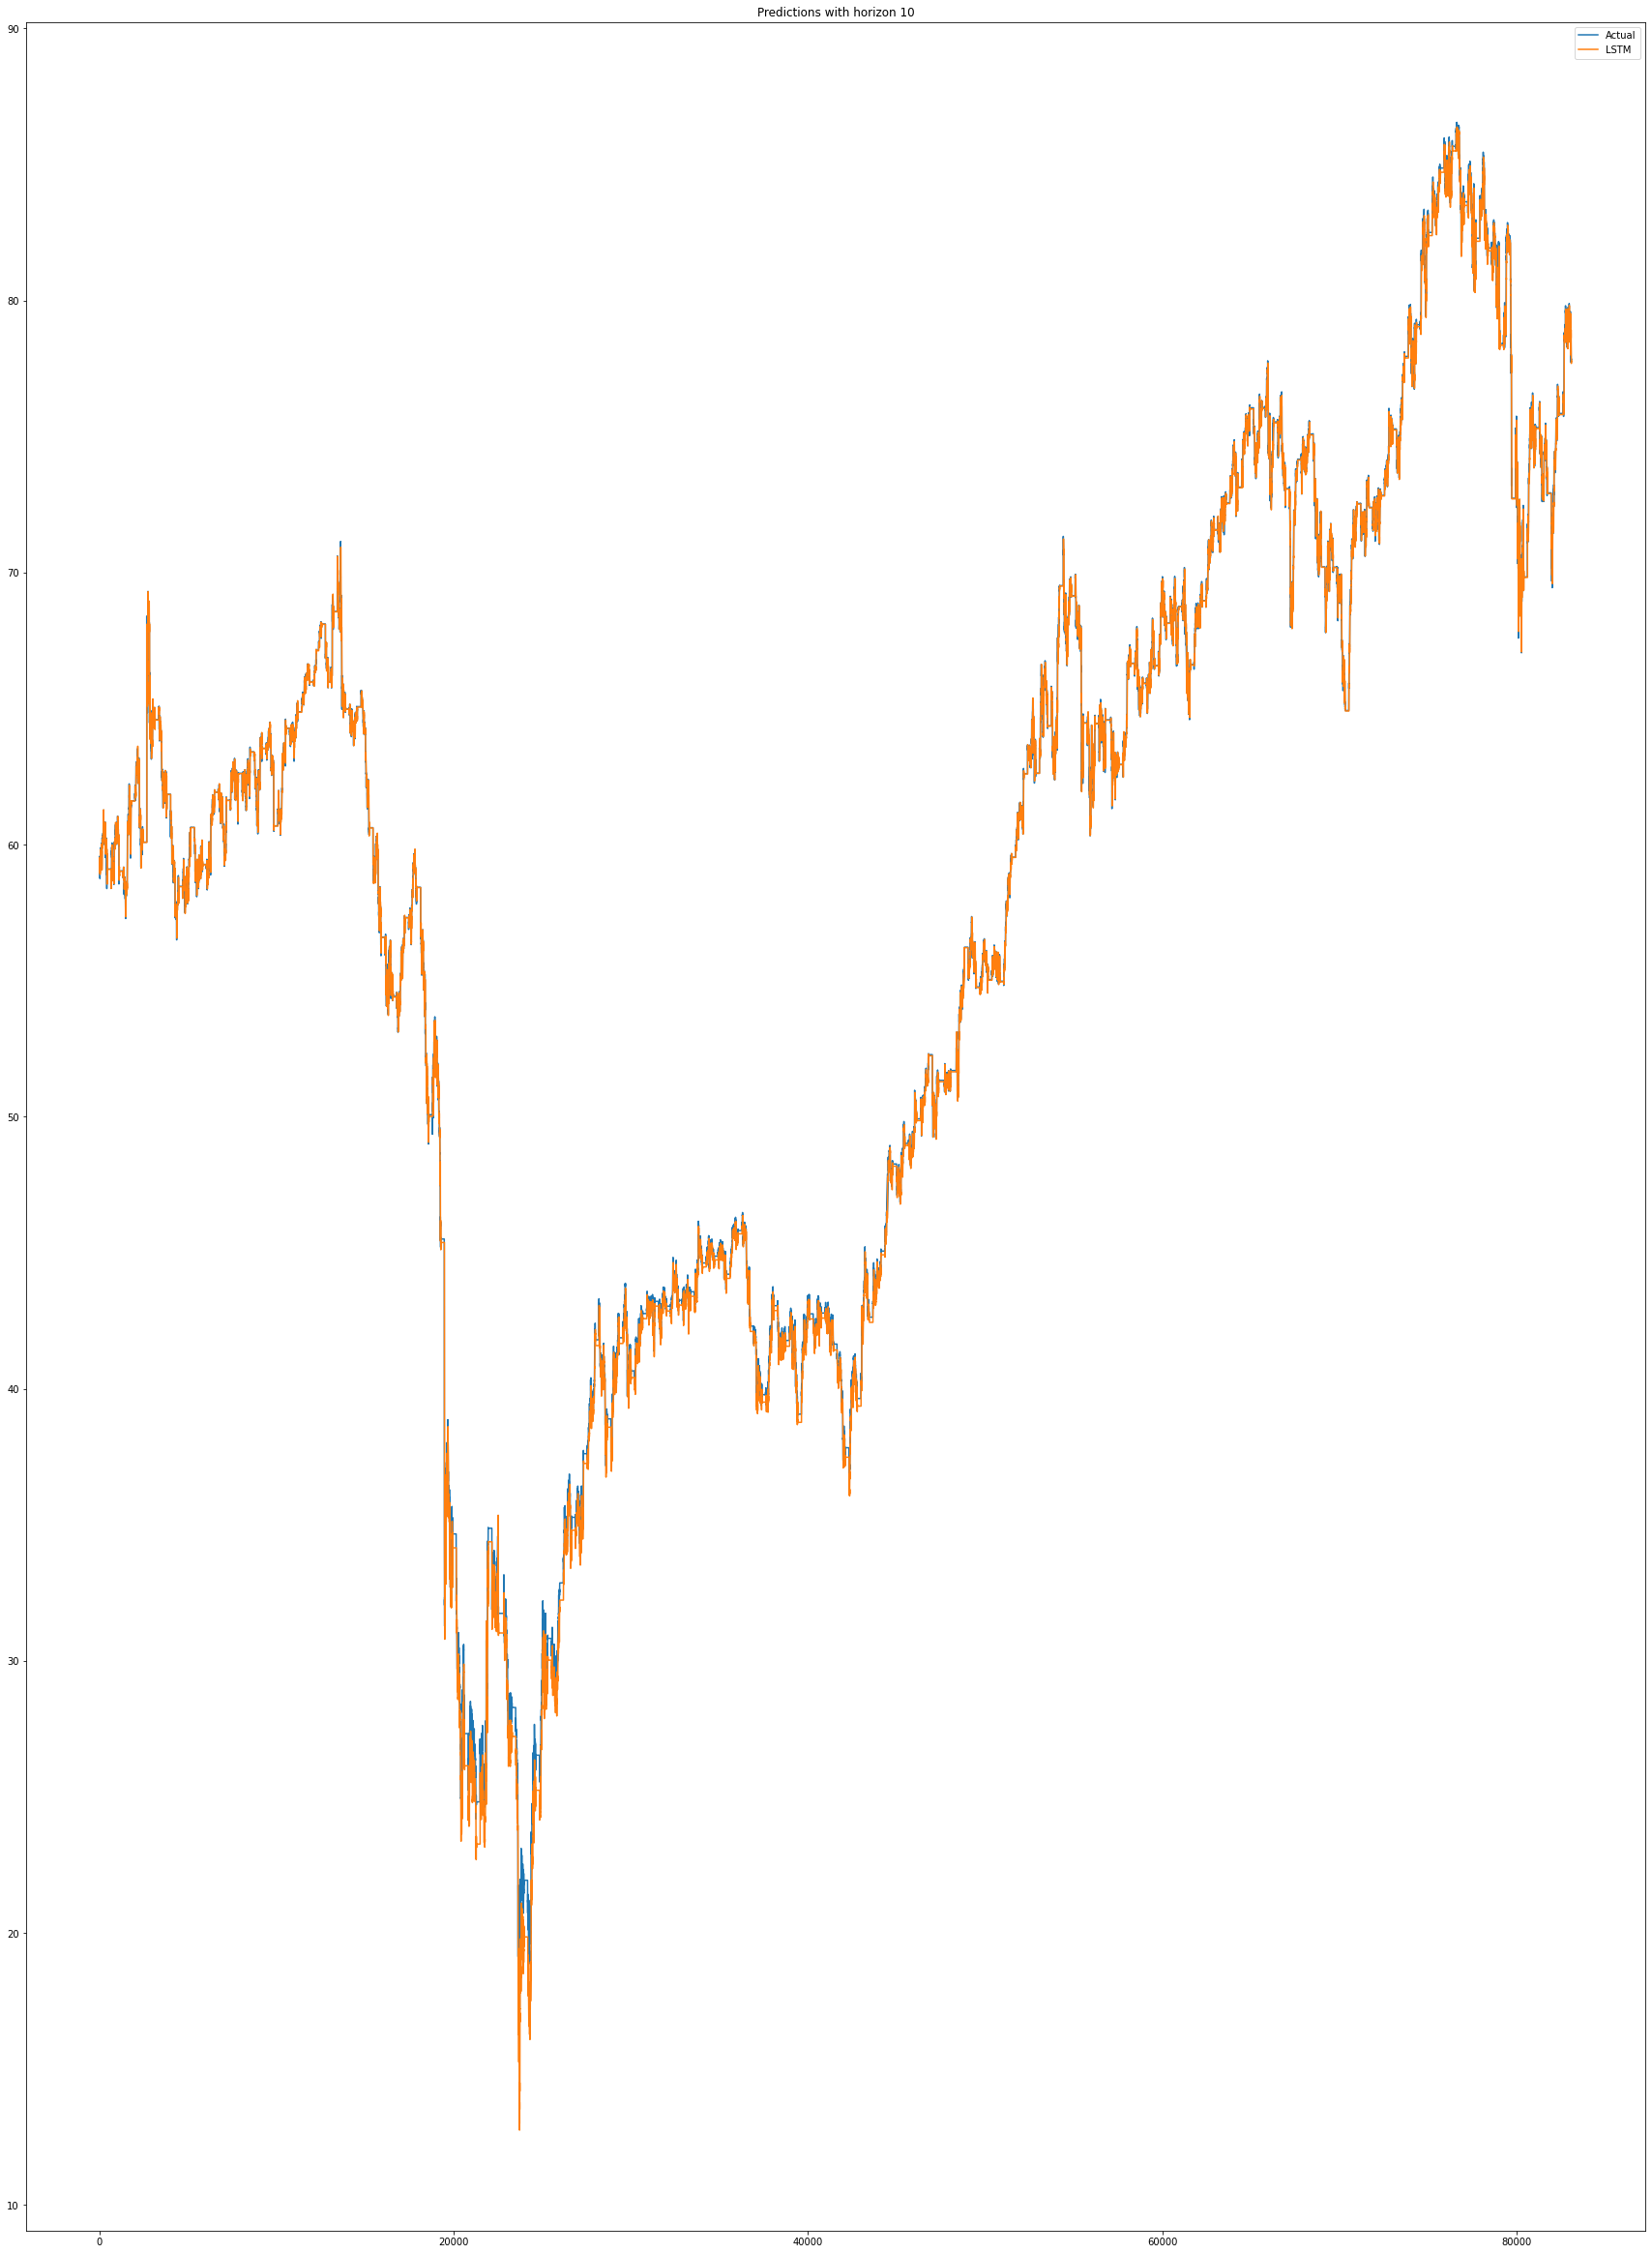

In [107]:
import matplotlib.pyplot as plt

# Generate predictions on the validation set

lstm_pred = lstm_model.predict(X_val)

# Create a plot with the predicted and actual values
plt.figure(figsize=(30, 42))
plt.plot(y_val, label='Actual')
plt.plot(lstm_pred, label='LSTM')
plt.legend()
plt.title(f'Predictions with horizon {horizon}')
plt.show()

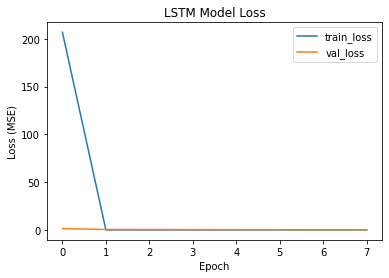

In [108]:
import matplotlib.pyplot as plt


# Plot the training and validation loss curves of the LSTM model
plt.plot(lstm_history.history['loss'], label='train_loss')
plt.plot(lstm_history.history['val_loss'], label='val_loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()